**Import Libraries**

- tensorflow is a deep learning library.

- layers and models are used to build the CNN architecture.

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

**Load Fashion MNIST Dataset**

- Loads the Fashion MNIST dataset, which contains:
    - 60,000 training images (X_train, y_train)
    - 10,000 testing images (X_test, y_test)
- Each image is a 28×28 grayscale image of a fashion item, and each label is an integer (0–9) representing a clothing category.

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

**Normalize Pixel Values**

- Image pixel values range from 0 to 255. Dividing by 255 scales them to 0–1, improving model performance and training stability.

In [4]:
X_train, X_test = X_train / 255.0, X_test / 255.0

**Reshape Data for CNN Input**

- CNNs expect input in the format (batch_size, height, width, channels).

- Here, we add a channel dimension (1 for grayscale images).

In [5]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

**Build CNN Architecture**

Let's break each layer:

1. Conv2D(32, (3, 3)): Applies 32 filters of size 3×3 to the image. ReLU adds non-linearity.
2. MaxPooling2D(2, 2): Reduces feature map size by taking max over 2×2 regions.
3. Conv2D(64, (3, 3)): Applies 64 filters. Deeper features are learned.
4. MaxPooling2D(2, 2): Downsamples again.
5. Flatten(): Converts 2D feature maps to a 1D vector for the dense layers.
6. Dense(128, activation='relu'): Fully connected layer with 128 neurons.
7. Dense(10, activation='softmax'): Output layer with 10 units for 10 classes, softmax gives class probabilities.

In [16]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

**Compiling the model**

- Optimizer: adam adjusts learning rates automatically during training.
- Loss: sparse_categorical_crossentropy is used for integer-labeled multi-class classification.
- Metrics: Track accuracy during training.

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Train the Model**

- Trains the model for 5 epochs.
- Uses (X_test, y_test) for validation (monitors performance on unseen data).
- An epoch is one complete pass through the entire training dataset.

In [8]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7808 - loss: 0.6094 - val_accuracy: 0.8701 - val_loss: 0.3568
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8864 - loss: 0.3077 - val_accuracy: 0.8874 - val_loss: 0.3132
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9055 - loss: 0.2567 - val_accuracy: 0.9017 - val_loss: 0.2739
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9185 - loss: 0.2190 - val_accuracy: 0.9062 - val_loss: 0.2644
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9268 - loss: 0.1972 - val_accuracy: 0.8999 - val_loss: 0.2798


**Evaluate Performance**

- Computes test loss and accuracy on the test set.
- Prints accuracy rounded to 4 decimal places.

In [9]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9007 - loss: 0.2843

Test accuracy: 0.8999


**Plot Accuracy Graph**

- Plots how accuracy changes over epochs for training and validation data.
- model.history stores metrics after fit().
- Helps detect overfitting (when training accuracy increases but validation does not).

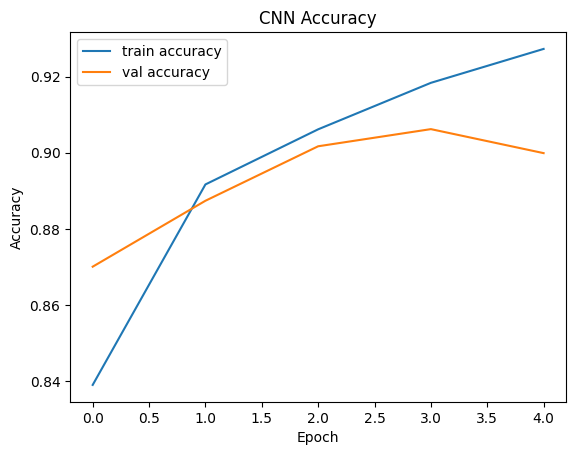

In [10]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

- class_names = [...]
This is a list of the 10 class labels in the Fashion MNIST dataset.
Each item in the dataset is a grayscale image (28×28) of a fashion item.
The labels (y_train[i]) are integers from 0 to 9.
This list maps those integers to human-readable names.

- plt.figure(figsize=(10,10))
Creates a new figure with a size of 10x10 inches for plotting.
This sets the overall canvas size where subplots will be placed.

- for i in range(25):
This loops over the first 25 images (from X_train[0] to X_train[24]), displaying them one by one.

- plt.subplot(5,5,i+1)
Creates a 5x5 grid of subplots.
i+1 specifies the current subplot position (subplot index starts at 1).
So this will fill subplots from the top-left to the bottom-right.

- Inside the loop:
plt.xticks([])
plt.yticks([])
plt.grid(False)
These three lines:
Remove x and y axis ticks 
Remove the grid
This is just to make the image display cleaner and clearer.

- plt.imshow(X_train[i], cmap=plt.cm.binary)
Displays the image X_train[i].
cmap=plt.cm.binary renders the grayscale image in black and white instead of default colors.

-  plt.xlabel(class_names[y_train[i]])
Displays the label of the image below it.
y_train[i] gives the class number (0–9), and class_names[...] maps it to a readable name (e.g., "Shirt").

-  plt.show()
Finally, shows the complete figure with all 25 images.

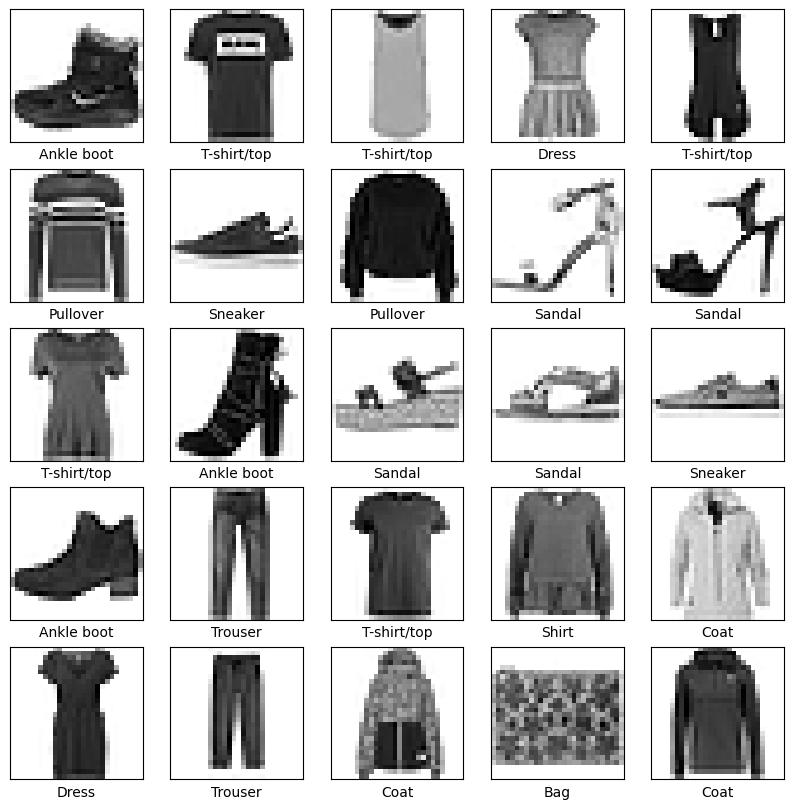

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

**Make Predictions (model.predict(X_test)):**
- This line uses the trained model to make predictions on the test dataset (X_test).
- model.predict(X_test) returns the predicted probabilities for each class (0-9) for each image in the test set. Each image has a probability distribution over the 10 classes.

**Convert Probabilities to Class Labels (argmax(axis=1)):**
- The model returns a probability distribution for each test image, but we need the predicted class label (not the probability) to compare with the actual label.
- predictions.argmax(axis=1) finds the index of the maximum value (highest probability) along the axis of the classes (axis=1), which corresponds to the predicted class label for each image.
- For example, if the output for an image is [0.1, 0.3, 0.2, 0.4, ...], argmax() will return the index 3 (the class with the highest probability).

**For Loop Explanation**
- plt.figure(figsize=(10,10)): Initializes a figure with a size of 10x10 inches for displaying the images.
- for i in range(25):: This loop iterates over the first 25 images in the test set (X_test). For each image:
- plt.subplot(5,5,i+1): Creates a 5x5 grid of subplots (since we want to display 25 images). Each image is placed in one subplot.
- plt.xticks([]) and plt.yticks([]): These lines remove the ticks on the x and y axes to make the plot look cleaner (we don't need axis labels).
- plt.grid(False): This disables the grid lines to ensure the focus stays on the images.
- plt.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.binary): Displays the image at index i in the X_test array. Since X_test is a 4D array ((num_images, 28, 28, 1)), .reshape(28, 28) is used to convert it back to a 2D array to correctly display the image. The cmap=plt.cm.binary argument sets the color map to grayscale.
- actual_label = class_names[y_test[i]]: Gets the actual label for the image at index i from the y_test array (the true label of the image).
- predicted_label = class_names[predicted_labels[i]]: Gets the predicted label for the image at index i from the predicted_labels array (the class predicted by the model).
- plt.xlabel(f"Actual: {actual_label}\nPred: {predicted_label}"): Displays the actual and predicted labels as text below each image. This shows both the true label and the predicted label.

**Adjust Layout to Prevent Overlapping:**
- This line adjusts the spacing between the rows of images.
- hspace=0.5 increases the vertical space between the rows of subplots, ensuring that the text labels (Actual & Predicted) don't overlap with the images.

**Show The Plot**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


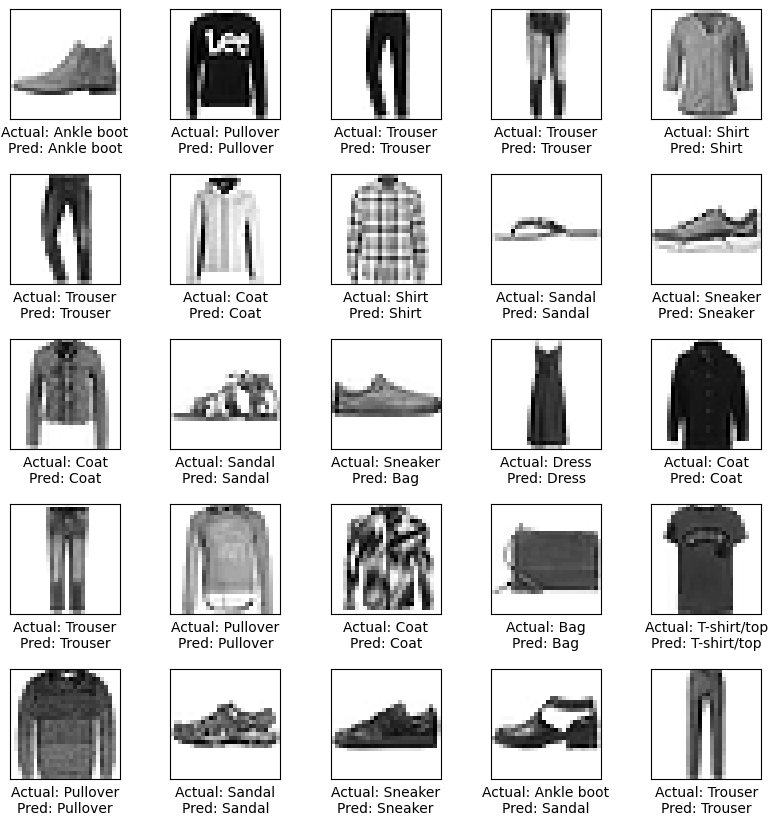

In [14]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Convert the predictions from probabilities to class labels
predicted_labels = predictions.argmax(axis=1)

# Visualize some test images with both actual and predicted labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.binary)
    actual_label = class_names[y_test[i]]
    predicted_label = class_names[predicted_labels[i]]
    plt.xlabel(f"Actual: {actual_label}\nPred: {predicted_label}")
plt.subplots_adjust(hspace=0.5)
plt.show()